In [ ]:
!pip install instagramy
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
from instagramy import InstagramUser
from instagramy import InstagramPost

session_id = "47428141866%3AHopqobbtMNZtv5%3A17"

In [ ]:
def briefing(nodes, post_type, desc, caption, likes, comments_no, post_id, timestamp, brand_name, brand):
  for node in nodes:
    child = node['node']
    post_type.append(child['__typename'])
    desc.append(child['accessibility_caption'])
    caption.append(child['edge_media_to_caption']['edges'][0]['node']['text'])
    likes.append(child['edge_liked_by']['count'])
    comments_no.append(child['edge_media_to_comment']['count'])
    post_id.append(child['shortcode'])
    timestamp.append(datetime.fromtimestamp(child['taken_at_timestamp']))
    brand_name.append(brand)

In [ ]:
brands = ['cocacola', 'pepsi', 'sprite']
post_type = []
desc = []
caption = []
likes = []
comments_no = []
post_id = []
timestamp = []
brand_name = []
# Connecting the profile
for brand in brands:
  user = InstagramUser(brand, sessionid=session_id)
  print(user.is_verified)
  user_data = user.user_data
  bio = user_data['biography']
  biz_cat = user_data['business_category_name']
  following = user_data['edge_follow']['count']
  followed_by = user_data['edge_followed_by']['count']
  post_no = user_data['edge_owner_to_timeline_media']['count']
  print(f"Brand: {brand} \n Bio: {bio} \n Business category: {biz_cat} \n Followed by: {followed_by} \n Following: {following} \n Number of posts: {post_no}")
  briefing(user_data['edge_owner_to_timeline_media']['edges'], post_type, desc, caption, likes, comments_no, post_id, timestamp, brand_name, brand)



True
Brand: cocacola 
 Bio: Together, we must build a better future. 
 Business category: Food & Personal Goods 
 Followed by: 2787246 
 Following: 237 
 Number of posts: 232
True
Brand: pepsi 
 Bio: Serving stunning Pepsi visuals all day, every day. So get ready to double tap. 
 Business category: Food & Personal Goods 
 Followed by: 1729737 
 Following: 31 
 Number of posts: 555
True
Brand: sprite 
 Bio: 2021 plans - Create. Act. Continue the fight. 
 Business category: Personal Goods & General Merchandise Stores 
 Followed by: 877593 
 Following: 1000 
 Number of posts: 170


In [ ]:
brief = pd.DataFrame(data = {'Type':post_type, 'Description':desc, 'Caption':caption, 'Likes':likes, 'Comments':comments_no, "ID":post_id, 'Timestamp':timestamp, 'Brand':brand_name})
brief.head(10)

,Type,Description,Caption,Likes,Comments,ID,Timestamp,Brand
0,GraphImage,"Photo by Coca-Cola on May 03, 2021. May be an ...","Two little words, so much flavor. Comment the ...",3151,217,COa8EdZnfrY,2021-05-03 18:30:17,cocacola
1,GraphImage,"Photo by Coca-Cola on April 30, 2021. May be a...",Happiness is the best interior decorator. Tag ...,8508,250,COSyNzqMT4f,2021-04-30 14:30:16,cocacola
2,GraphSidecar,"Photo by Coca-Cola on April 27, 2021.",Can you make it to the middle of the maze? Swi...,6011,201,COK9QS-H7aj,2021-04-27 13:32:39,cocacola
3,GraphImage,"Photo by Coca-Cola on March 24, 2021. May be a...",We condemn the racist incidents targeting the ...,10410,3993,CMz-9qLH5rB,2021-03-24 18:53:47,cocacola
4,GraphImage,"Photo by Coca-Cola on March 11, 2021.",Coca-Cola is a wonderfully refreshing piece of...,5881,1200,CMShYVenVOh,2021-03-11 19:00:21,cocacola
5,GraphVideo,None,Channeling positivity your way.,3204,415,CMNmf-unoLF,2021-03-09 21:09:04,cocacola
6,GraphImage,"Photo by Coca-Cola on February 17, 2021. May b...",There’s no cap on how much we love our fans!,8604,6729,CLZ0dSfJ8Ko,2021-02-17 18:30:21,cocacola
7,GraphImage,"Photo by Coca-Cola on February 14, 2021. May b...",Valentine’s Day? More like Valentine’s Year. (...,6450,852,CLR05MBHyPK,2021-02-14 16:00:14,cocacola
8,GraphImage,"Photo by Coca-Cola on February 03, 2021. May b...",Together We Must amplify Black Voices of Coura...,3899,1073,CK1qc3VHGjh,2021-02-03 17:30:13,cocacola
9,GraphImage,"Photo by Coca-Cola on February 02, 2021. May b...",Representative John Lewis spent his life fight...,4834,825,CKzJHumnabR,2021-02-02 18:00:30,cocacola


In [ ]:
brief['Day'] = brief['Timestamp'].dt.day
brief['Month'] = brief['Timestamp'].dt.month
brief['Hour'] = brief['Timestamp'].dt.hour
brief['Weekday'] = brief['Timestamp'].dt.day_name()
brief

,Type,Description,Caption,Likes,Comments,ID,Timestamp,Brand,Day,Month,Hour,Weekday
0,GraphImage,"Photo by Coca-Cola on May 03, 2021. May be an ...","Two little words, so much flavor. Comment the ...",3151,217,COa8EdZnfrY,2021-05-03 18:30:17,cocacola,3,5,18,Monday
1,GraphImage,"Photo by Coca-Cola on April 30, 2021. May be a...",Happiness is the best interior decorator. Tag ...,8508,250,COSyNzqMT4f,2021-04-30 14:30:16,cocacola,30,4,14,Friday
2,GraphSidecar,"Photo by Coca-Cola on April 27, 2021.",Can you make it to the middle of the maze? Swi...,6011,201,COK9QS-H7aj,2021-04-27 13:32:39,cocacola,27,4,13,Tuesday
3,GraphImage,"Photo by Coca-Cola on March 24, 2021. May be a...",We condemn the racist incidents targeting the ...,10410,3993,CMz-9qLH5rB,2021-03-24 18:53:47,cocacola,24,3,18,Wednesday
4,GraphImage,"Photo by Coca-Cola on March 11, 2021.",Coca-Cola is a wonderfully refreshing piece of...,5881,1200,CMShYVenVOh,2021-03-11 19:00:21,cocacola,11,3,19,Thursday
5,GraphVideo,None,Channeling positivity your way.,3204,415,CMNmf-unoLF,2021-03-09 21:09:04,cocacola,9,3,21,Tuesday
6,GraphImage,"Photo by Coca-Cola on February 17, 2021. May b...",There’s no cap on how much we love our fans!,8604,6729,CLZ0dSfJ8Ko,2021-02-17 18:30:21,cocacola,17,2,18,Wednesday
7,GraphImage,"Photo by Coca-Cola on February 14, 2021. May b...",Valentine’s Day? More like Valentine’s Year. (...,6450,852,CLR05MBHyPK,2021-02-14 16:00:14,cocacola,14,2,16,Sunday
8,GraphImage,"Photo by Coca-Cola on February 03, 2021. May b...",Together We Must amplify Black Voices of Coura...,3899,1073,CK1qc3VHGjh,2021-02-03 17:30:13,cocacola,3,2,17,Wednesday
9,GraphImage,"Photo by Coca-Cola on February 02, 2021. May b...",Representative John Lewis spent his life fight...,4834,825,CKzJHumnabR,2021-02-02 18:00:30,cocacola,2,2,18,Tuesday


In [ ]:
brief.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         36 non-null     object        
 1   Description  17 non-null     object        
 2   Caption      36 non-null     object        
 3   Likes        36 non-null     int64         
 4   Comments     36 non-null     int64         
 5   ID           36 non-null     object        
 6   Timestamp    36 non-null     datetime64[ns]
 7   Brand        36 non-null     object        
 8   Day          36 non-null     int64         
 9   Month        36 non-null     int64         
 10  Hour         36 non-null     int64         
 11  Weekday      36 non-null     object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 3.5+ KB


In [ ]:
brief.groupby(['Brand']).agg({'Likes':['sum', 'mean'], 'Comments':['sum', 'mean']})

Likes              Comments             
            sum         mean      sum         mean
Brand                                             
cocacola  69031  5752.583333    16313  1359.416667
pepsi     91020  7585.000000     2657   221.416667
sprite    14579  1214.916667     6359   529.916667

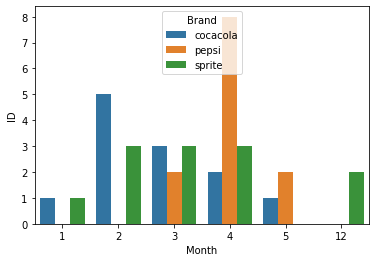

In [ ]:
brand_general = brief.groupby(['Brand', 'Month']).agg({'ID':'count'}).reset_index()
sns.barplot(data=brand_general, x="Month", y="ID", hue="Brand")
plt.show()

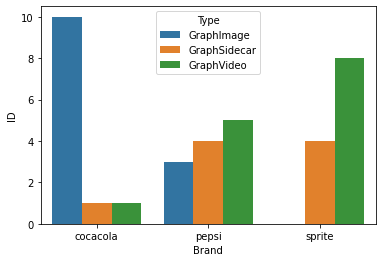

In [ ]:
brand_general_type = brief.groupby(['Brand', 'Type']).agg({'ID':'count'}).reset_index()
sns.barplot(data=brand_general_type, x="Brand", y="ID", hue="Type")
plt.show()

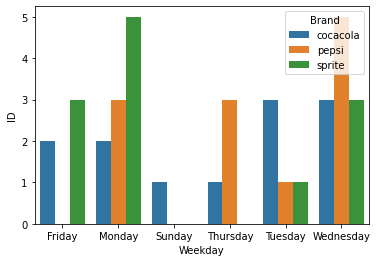

In [ ]:
brand_general_weekday = brief.groupby(['Brand', 'Weekday']).agg({'ID':'count'}).reset_index()
sns.barplot(data=brand_general_weekday, x="Weekday", y="ID", hue="Brand")
plt.show()

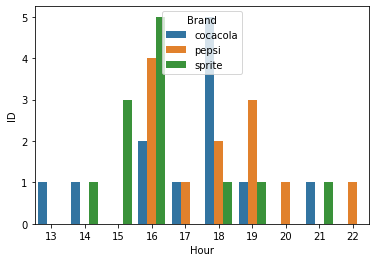

In [ ]:
brand_general_hour = brief.groupby(['Brand', 'Hour']).agg({'ID':'count'}).reset_index()
sns.barplot(data=brand_general_hour, x="Hour", y="ID", hue="Brand")
plt.show()

In [ ]:
brief.groupby(['Brand', 'Month', 'Type']).agg({'ID':'count'})

ID
Brand    Month Type            
cocacola 1     GraphImage     1
         2     GraphImage     5
         3     GraphImage     2
               GraphVideo     1
         4     GraphImage     1
               GraphSidecar   1
         5     GraphImage     1
pepsi    3     GraphVideo     2
         4     GraphImage     2
               GraphSidecar   4
               GraphVideo     2
         5     GraphImage     1
               GraphVideo     1
sprite   1     GraphVideo     1
         2     GraphVideo     3
         3     GraphSidecar   3
         4     GraphVideo     3
         12    GraphSidecar   1
               GraphVideo     1

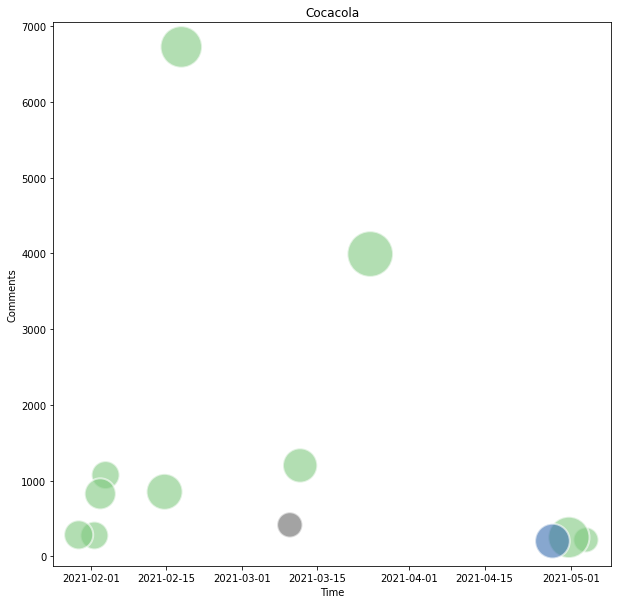

In [ ]:
brief['Type'] = brief['Type'].astype('category')
plt.figure(figsize=(10, 10))
plt.scatter(
    x = brief[brief.Brand == 'cocacola']['Timestamp'], 
    y = brief[brief.Brand == 'cocacola']['Comments'], 
    s = brief[brief.Brand == 'cocacola']['Likes']/5, 
    c = brief[brief.Brand == 'cocacola']['Type'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
plt.title('Cocacola')
plt.xlabel("Time")
plt.ylabel("Comments")
plt.show()

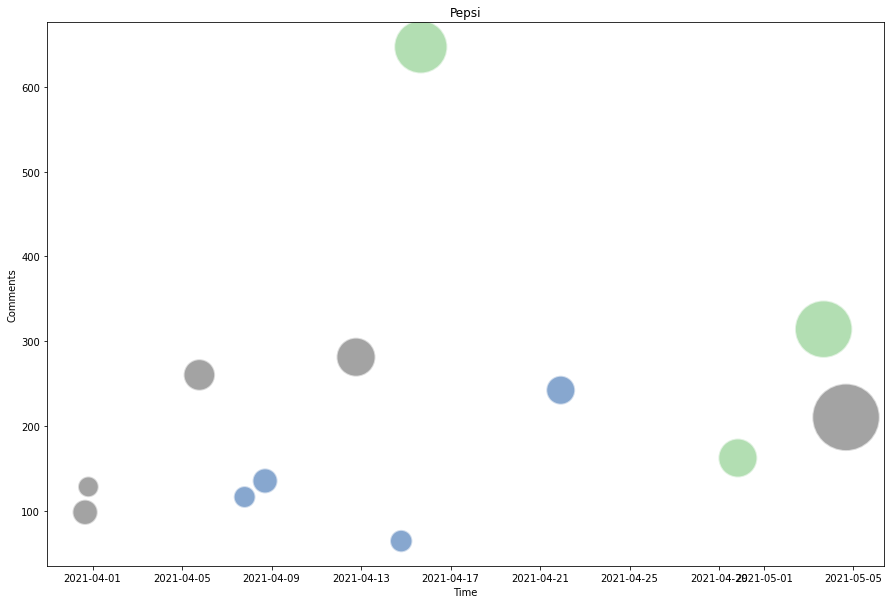

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(
    x = brief[brief.Brand == 'pepsi']['Timestamp'], 
    y = brief[brief.Brand == 'pepsi']['Comments'], 
    s = brief[brief.Brand == 'pepsi']['Likes']/5, 
    c = brief[brief.Brand == 'pepsi']['Type'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
plt.title('Pepsi')
plt.xlabel("Time")
plt.ylabel("Comments")
plt.show()

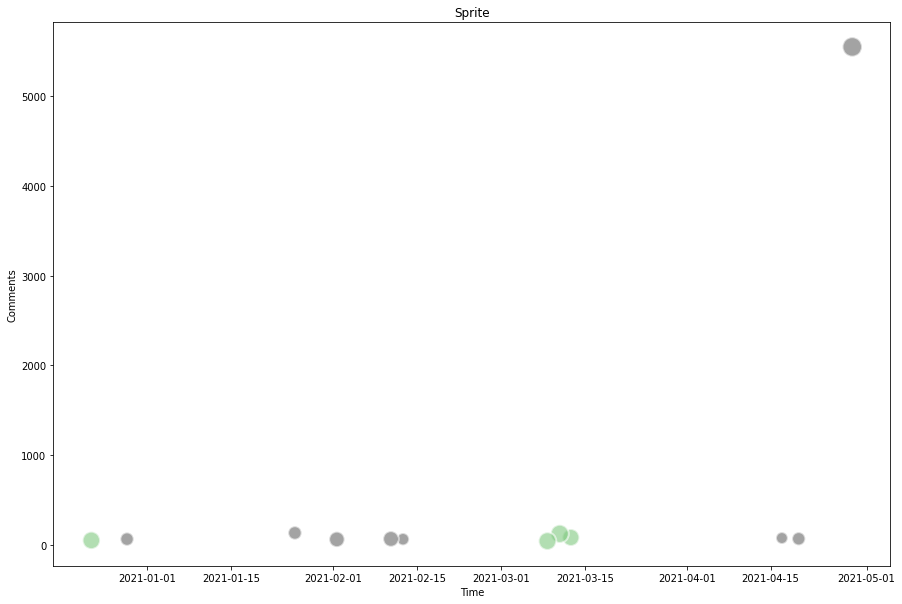

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(
    x = brief[brief.Brand == 'sprite']['Timestamp'], 
    y = brief[brief.Brand == 'sprite']['Comments'], 
    s = brief[brief.Brand == 'sprite']['Likes']/5, 
    c = brief[brief.Brand == 'sprite']['Type'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
plt.title('Sprite')
plt.xlabel("Time")
plt.ylabel("Comments")
plt.show()

In [ ]:
def json_extract(obj, key):
    """Recursively fetch values from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values

In [ ]:
dct = {}
codes = brief.ID
for code in codes:
    post = InstagramPost(code, sessionid=session_id)
    dct[code] = json_extract(post.post_data, 'text')

In [ ]:
cmts = []
post_id = []
for id in dct.keys():
  for cmt in dct[id]:
    post_id.append(id)
    cmts.append(cmt)

In [ ]:
post_comments = pd.DataFrame(data = {"ID":post_id, "Comment":cmts})
post_comments.head(10)

,ID,Comment
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ..."
1,COa8EdZnfrY,Orange vanilla
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️
3,COa8EdZnfrY,@cocacola ❤️
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...
5,COa8EdZnfrY,Enjoying not buying Coca Cola…was easy
6,COa8EdZnfrY,@griebtex most of my whole town not drinking i...
7,COa8EdZnfrY,@griebtex same here...done with it. The local ...
8,COa8EdZnfrY,@dreigel411 yup I quit too
9,COa8EdZnfrY,"I will never buy ANY of your products again, g..."


In [ ]:
post_comments = post_comments.merge(brief[['ID', 'Brand']], how='left', on = 'ID')
post_comments.head()

,ID,Comment,Brand
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ...",cocacola
1,COa8EdZnfrY,Orange vanilla,cocacola
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️,cocacola
3,COa8EdZnfrY,@cocacola ❤️,cocacola
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...,cocacola


In [ ]:
post_comments['Tag no'] = post_comments['Comment'].apply(lambda x: len(re.findall('@\w+', x)))
post_comments.head()

,ID,Comment,Brand,Tag no
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ...",cocacola,0
1,COa8EdZnfrY,Orange vanilla,cocacola,0
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️,cocacola,1
3,COa8EdZnfrY,@cocacola ❤️,cocacola,1
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...,cocacola,1


In [ ]:
post_comments.groupby('Brand').sum()

,Tag no
Brand,
cocacola,188
pepsi,143
sprite,253


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')


def clean_text(text):
  text = text.lower()
  text = re.sub('@', '', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub(r"[^a-zA-Z ]+", "", text)
    
  #Tokenize the data
  text = nltk.word_tokenize(text)
  #Remove stopwords
  text = [w for w in text if w not in stop_words]
  return text

post_comments['Tokenized comment'] = post_comments['Comment'].apply(lambda x: clean_text(x))

post_comments.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Comment,Brand,Tag no,Tokenized comment
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ...",cocacola,0,"[two, little, words, much, flavor, comment, an..."
1,COa8EdZnfrY,Orange vanilla,cocacola,0,"[orange, vanilla]"
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️,cocacola,1,[bingo]
3,COa8EdZnfrY,@cocacola ❤️,cocacola,1,[cocacola]
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...,cocacola,1,"[cocacola, unforgivably, antisemitic, person, ..."


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
post_comments['Tokenized comment'] = post_comments['Tokenized comment'].apply(lambda x: lem(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
post_comments.head()

,ID,Comment,Brand,Tag no,Tokenized comment
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ...",cocacola,0,"[two, little, word, much, flavor, comment, ans..."
1,COa8EdZnfrY,Orange vanilla,cocacola,0,"[orange, vanilla]"
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️,cocacola,1,[bingo]
3,COa8EdZnfrY,@cocacola ❤️,cocacola,1,[cocacola]
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...,cocacola,1,"[cocacola, unforgivably, antisemitic, person, ..."


In [ ]:
#Remove all empty comments
empty_comment = []
for i in range(len(post_comments)):
    if post_comments['Tokenized comment'][i]==empty_comment:
        post_comments=post_comments.drop(i)
post_comments=post_comments.reset_index(drop=True)

In [ ]:
post_comments.head()

,ID,Comment,Brand,Tag no,Tokenized comment
0,COa8EdZnfrY,"Two little words, so much flavor. Comment the ...",cocacola,0,"[two, little, word, much, flavor, comment, ans..."
1,COa8EdZnfrY,Orange vanilla,cocacola,0,"[orange, vanilla]"
2,COa8EdZnfrY,@jonahf2021 Bingo! ♥️,cocacola,1,[bingo]
3,COa8EdZnfrY,@cocacola ❤️,cocacola,1,[cocacola]
4,COa8EdZnfrY,@cocacola why is an Unforgivably Anti-Semitic ...,cocacola,1,"[cocacola, unforgivably, antisemitic, person, ..."


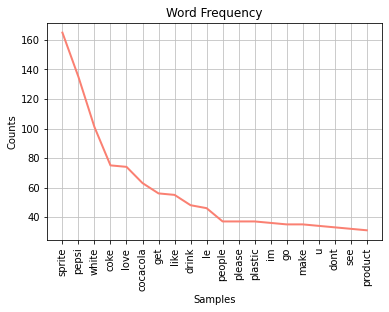

In [ ]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(post_comments)):
    all_words = all_words + post_comments['Tokenized comment'][i]
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

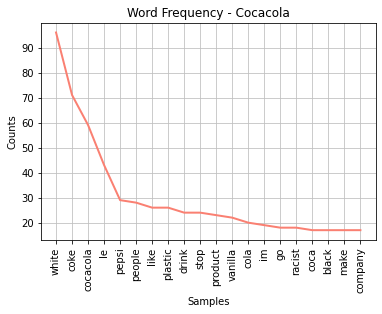

In [ ]:
post_coke = post_comments[post_comments['Brand'] == 'cocacola']
post_coke = post_coke[post_coke.astype(str)['Tokenized comment']!='[]'].reset_index()
all_words_coke = []
post_coke['Tokenized comment'][0]
for i in range(len(post_coke)):
  all_words_coke = all_words_coke + post_coke['Tokenized comment'][i]
#Get word frequency        
nlp_words_coke = nltk.FreqDist(all_words_coke)
plot2 = nlp_words_coke.plot(20, color='salmon', title='Word Frequency - Cocacola')

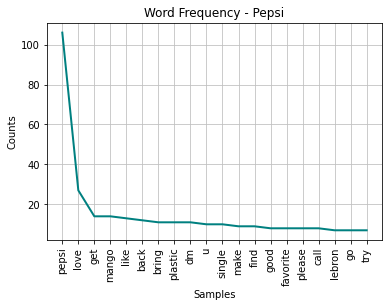

In [ ]:
post_pepsi = post_comments[post_comments['Brand'] == 'pepsi']
post_pepsi = post_pepsi[post_pepsi.astype(str)['Tokenized comment']!='[]'].reset_index()
all_words_pepsi = []
for i in range(len(post_pepsi)):
  all_words_pepsi = all_words_pepsi + post_pepsi['Tokenized comment'][i]
#Get word frequency        
nlp_words_pepsi = nltk.FreqDist(all_words_pepsi)
plot3 = nlp_words_pepsi.plot(20, color='teal', title='Word Frequency - Pepsi')

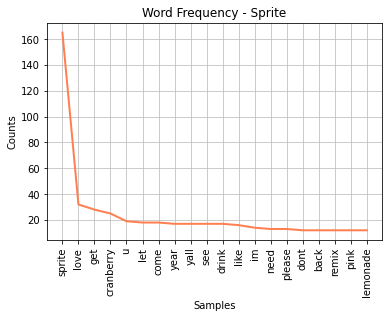

In [ ]:
post_sprite = post_comments[post_comments['Brand'] == 'sprite']
post_sprite = post_sprite[post_sprite.astype(str)['Tokenized comment']!='[]'].reset_index()
all_words_sprite = []
for i in range(len(post_sprite)):
  all_words_sprite = all_words_sprite + post_sprite['Tokenized comment'][i]
#Get word frequency        
nlp_words_sprite = nltk.FreqDist(all_words_sprite)
plot4 = nlp_words_sprite.plot(20, color='coral', title='Word Frequency - Sprite')

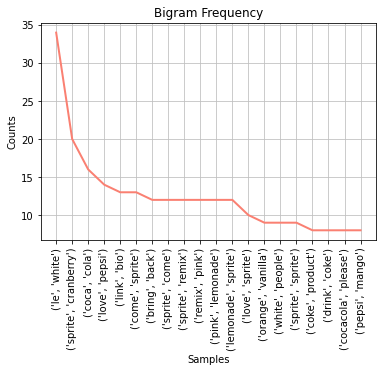

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

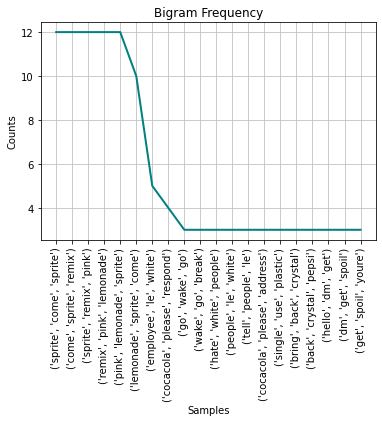

In [ ]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(20, color='teal', title='Bigram Frequency')

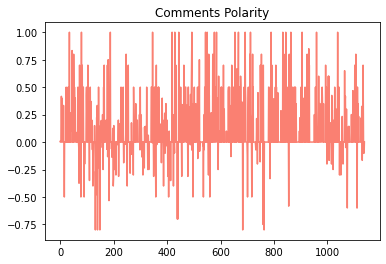

In [ ]:
#Get sentiment from comments
post_comments['Tokenized comment'] = [str(i) for i in post_comments['Tokenized comment']]
sentiment = []
for i in range(len(post_comments)):
    blob = TextBlob(post_comments['Tokenized comment'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
post_comments['Sentiment']=sentiment
#Plot
post_comments['Sentiment'].plot.line(color='salmon', title='Comments Polarity')
plt.show()

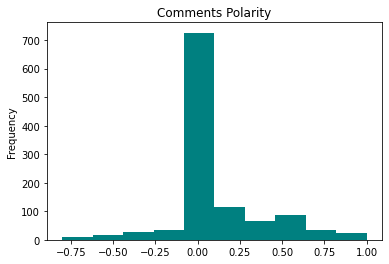

In [ ]:
post_comments['Sentiment'].plot.hist(color='teal', title='Comments Polarity')
plt.show()

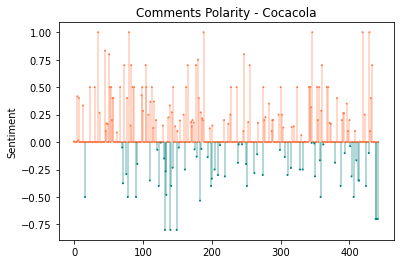

In [ ]:
my_color = np.where(post_comments[post_comments.Brand == 'cocacola'].Sentiment >= 0, 'coral', 'teal')
plt.vlines(x=range(len(post_comments[post_comments['Brand'] == 'cocacola'])), ymin=0, ymax=post_comments[post_comments['Brand'] == 'cocacola']['Sentiment'], color=my_color, alpha=0.4)
plt.scatter(x=range(len(post_comments[post_comments['Brand'] == 'cocacola'])), y=post_comments[post_comments['Brand'] == 'cocacola']['Sentiment'], color=my_color, s=1, alpha=1)
plt.title("Comments Polarity - Cocacola", loc='center')
plt.ylabel('Sentiment')
plt.show()

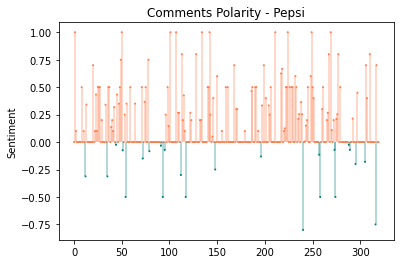

In [ ]:
my_color = np.where(post_comments[post_comments.Brand == 'pepsi'].Sentiment >= 0, 'coral', 'teal')
plt.vlines(x=range(len(post_comments[post_comments['Brand'] == 'pepsi'])), ymin=0, ymax=post_comments[post_comments['Brand'] == 'pepsi']['Sentiment'], color=my_color, alpha=0.4)
plt.scatter(x=range(len(post_comments[post_comments['Brand'] == 'pepsi'])), y=post_comments[post_comments['Brand'] == 'pepsi']['Sentiment'], color=my_color, s=1, alpha=1)
plt.title("Comments Polarity - Pepsi", loc='center')
plt.ylabel('Sentiment')
plt.show()

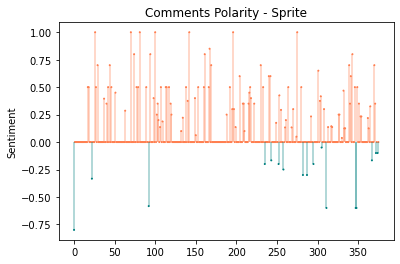

In [ ]:
my_color = np.where(post_comments[post_comments.Brand == 'sprite'].Sentiment >= 0, 'coral', 'teal')
plt.vlines(x=range(len(post_comments[post_comments['Brand'] == 'sprite'])), ymin=0, ymax=post_comments[post_comments['Brand'] == 'sprite']['Sentiment'], color=my_color, alpha=0.4)
plt.scatter(x=range(len(post_comments[post_comments['Brand'] == 'sprite'])), y=post_comments[post_comments['Brand'] == 'sprite']['Sentiment'], color=my_color, s=1, alpha=1)
plt.title("Comments Polarity - Sprite", loc='center')
plt.ylabel('Sentiment')
plt.show()